# Data Science in Python

## Extrcting the data from the API and Visualization is in notebook 2

####  API Choosed: Last.FM API
#### Link: https://www.last.fm/api  
#### Keywords: music, entertainment



#### A quick drive and measures followed up for retrieving the Data from API, before getting started a short introduction of what exactly this data refers to and what this is been done. 

##### Firstly selected the API from the given list of API’s, the API is the Application program interface which is used to communicate between the different applications. In short stated in the example below, for communicating the information between the interfaces these APIs are used to fetch the data according to the customer's needs. 


##### Example of API: Fetching the available flights in the application where after entering the from and to address and selecting the specific data the results shown in the custom page were triggered by using the API’s which get the data and present it to the web page.

##### Here the API selected from the given list of APIs is “Last.FM API”, followed by the link “https://www.last.fm/api”. From this API considered a set of artist as shown in figure those artists were the Indian Music Directors and playback singers, here analysed the data of each artist and their count plays for where users often listen and also form this API, considered the data like 250 songs where total of record of approx 2500 songs were listed and the fields or columns considered from this API were, Artist, Track, Playcount, Album, Duration, Listeners, Artist URL, Track URL, all these columns were taken into the the data retrieve analysis from the API

##### Indian Film Music Directors and Playback Singers

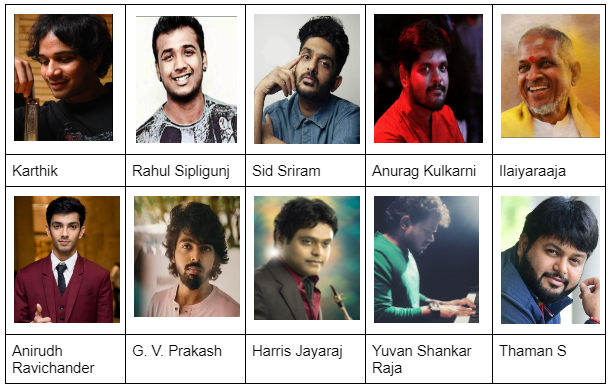

##### These 10 artists' data is considered and analysis is done based upon their play counts, like for each artist their play counts and different duration and listeners, where this specially focuses on each artist and their playcounts. 

##### After creating the API account by using  “https://www.last.fm/api/account/create “ by using the API Key and Secret from Last.fm started collecting data from the Last.fm API. Once you have created your account, you can generate your API key and secret.


##### For this API, there is a default library which is already present and this is considered to traverse to retrieve the data. When it comes to APIs status code is the required analysis to check and predict the working of the API. So with the help of the user agent the payloads by passing the method performed the response status code, where shown in the below which is useful to know the working of the API, and also the total page is grabbed from the  API for knowing the pages that the API holds. 


##### Pylast is the python package, where this provides the interface to communicate with Last.fm API, where this library is used to reduce code redundancy. This library used to get the track information and user listening history and more, fields where this acts as interface, this is been installed by using this command “!pip install pylast pandas”

##### This is the source where the pylast is used from https://github.com/pylast/pylast


##### Here it start's

In [9]:
import pylast
import pandas as pd

In [10]:
API_KEY = "493926b2daa7b26faed1b8b183d2a174"
API_SECRET = "7370196ca1275425327452b3e0aad4f0"
USER_AGENT = 'Building'

network = pylast.LastFMNetwork(api_key=API_KEY, api_secret=API_SECRET)

In [11]:
import requests

headers = {
    'user-agent': USER_AGENT
}

payload = {
    'api_key': API_KEY,
    'method': 'chart.gettopartists',
    'format': 'json'
}

r = requests.get('https://ws.audioscrobbler.com/2.0/', headers=headers, params=payload)
r.status_code

200

In [12]:
def lastfm_get(payload):
    # define headers and URL
    headers = {'user-agent': USER_AGENT}
    url = 'https://ws.audioscrobbler.com/2.0/'

    # Add API key and format to the payload
    payload['api_key'] = API_KEY
    payload['format'] = 'json'

    response = requests.get(url, headers=headers, params=payload)
    return response

In [13]:
r = lastfm_get({
    'method': 'chart.gettopartists'
})

r.status_code

200

In [20]:
import time
from IPython.core.display import clear_output

responses = []

page = 1
total_pages = 99999 # this is just a dummy number so the loop starts

while page <= total_pages:
    payload = {
        'method': 'chart.gettopartists',
        'limit': 500,
        'page': page
    }

    # print some output so we can see the status
    print("Requesting page {}/{}".format(page, total_pages))
    # clear the output to make things neater
    clear_output(wait = True)

    # make the API call
    response = lastfm_get(payload)

    # if we get an error, print the response and halt the loop
    if response.status_code != 200:
        print(response.text)
        break

    # extract pagination info
    page = int(response.json()['artists']['@attr']['page'])
    total_pages = int(response.json()['artists']['@attr']['totalPages'])

    # append response
    responses.append(response)

    # if it's not a cached result, sleep
    if not getattr(response, 'from_cache', False):
        time.sleep(0.25)

    # increment the page number
    page += 1

Requesting page 9231/9231


##### The benefit of requesting a page from the Last.fm API is that the client can obtain a limited amount of results each page as opposed to receiving all the results in one response. This is especially helpful when working with huge datasets because it decreases the quantity of data delivered with each request, improving process efficiency and requiring fewer resources.

##### If more data needed for analysis, made the code easy in the below code, can add the artists and num_tracks can be increased accordingly to the data needed for analysis. 

In [17]:
import time
import pandas as pd

artists = ["Karthik","Rahul Sipligunj","Sid Sriram","Anurag Kulkarni","Ilaiyaraaja","Anirudh Ravichander", "G. V. Prakash", "Harris Jayaraj", "Yuvan Shankar Raja", "Thaman S"]
num_tracks = 350 

artist = network.get_artist(artists)

data =  []

for artist_name in artists:
    artist = network.get_artist(artist_name)
    top_tracks = artist.get_top_tracks(limit=num_tracks)
    
    for track in top_tracks:
        track_data = {}
        track_data["Artist"] = artist_name
        track_data["Track"] = track.item.get_name()
        track_data["Playcount"] = track.item.get_playcount()
        album = track.item.get_album()
        if album is None:
            track_data["Album"] = "Unknown"
        else:
            track_data["Album"] = album.get_title()
        track_data["Duration"] = track.item.get_duration()
        track_data["Listeners"] = track.item.get_listener_count()
        track_data["Tags"] = [tag.item.get_name() for tag in track.item.get_top_tags()]
        track_data["Artist URL"] = track.item.get_artist().get_url()
        track_data["Track URL"] = track.item.get_url()
        data.append(track_data)
    time.sleep(1)
    
df = pd.DataFrame(data)
df.to_csv("lastfm_data.csv", index=False)


In [19]:
print(df.head())

    Artist                                              Track  Playcount  \
0  Karthik                                              Behka      16433   
1  Karthik  Oru Maalai (Language: Tamil; Film: Ghajini; Fi...       5470   
2  Karthik                                             Chance       4576   
3  Karthik                         Thooriga - From "Navarasa"      17755   
4  Karthik                                         Oru Maalai      16228   

                                               Album  Duration  Listeners  \
0                                            Ghajini    311000       3255   
1                                            Ghajini    353000       2848   
2                                             Energy    202000       2463   
3                                            Unknown         0       2244   
4  Ghajini (Original Motion Picture Soundtrack) - EP         0       2190   

                                                Tags  \
0  [bollywood, Hindi, up

##### This data is stored into the CSV life with name "lastfm_data.csv", and the above head describe sthe columns and data present in the csv file

In [18]:
print(df.shape)

(3395, 9)


##### The shape defines the rows and columns 2490 rows and columns/fields were 9. This is the first notebook where only data is reterived from the API and in second notebook states the characterization and summerization to this data. So this is how data is been reterived in appropriate format. 